In [1]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import category_encoders as ce
from sklearn.linear_model import LinearRegression
# from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns
d = sns.load_dataset("iris")
d.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
X = d.iloc[:,:2]
y = d.iloc[:,3]
print(X)
y

     sepal_length  sepal_width
0             5.1          3.5
1             4.9          3.0
2             4.7          3.2
3             4.6          3.1
4             5.0          3.6
..            ...          ...
145           6.7          3.0
146           6.3          2.5
147           6.5          3.0
148           6.2          3.4
149           5.9          3.0

[150 rows x 2 columns]


0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: petal_width, Length: 150, dtype: float64

In [3]:
pipe1 = make_pipeline(
    
     #encoding step
    ce.OneHotEncoder(use_cat_names=True),
    #add standard scaler here
    StandardScaler(),
    #the model
   # DecisionTreeClassifier(random_state =42)
    LinearRegression()
                    )
pipe1.fit(d.iloc[:,:2],d.iloc[:,3])

Pipeline(steps=[('onehotencoder', OneHotEncoder(cols=[], use_cat_names=True)),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
print("X_train shape",X_train.shape)
print("X_test shape",X.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

X_train shape (112, 2)
X_test shape (150, 2)
y_train shape (112,)
y_test shape (38,)


In [5]:
pipe1.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder(cols=[], use_cat_names=True)),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [6]:
y_pr = pipe1.predict(X_test)
y_pr

array([0.12904442, 0.23500414, 1.31006735, 0.72728891, 0.3564299 ,
       1.33094808, 1.81820718, 0.52619885, 1.99300181, 1.78108237,
       1.77064201, 1.74937226, 0.16616923, 0.31969411, 1.76020164,
       1.64882723, 0.29842436, 1.38392794, 1.34177746, 1.57457763,
       0.45194925, 0.92335329, 1.32592241, 1.68053735, 0.38311433,
       0.55249428, 1.50574271, 1.6592676 , 2.22038728, 1.59584738,
       2.08271745, 1.8445026 , 1.40519769, 0.89705786, 1.11400297,
       1.23581775, 0.33013448, 0.29300967])

In [7]:
mae1 = mean_absolute_error(y_test,y_pr)
mae1

0.2846128904827663

In [8]:
pipe1.score(X_test,y_test)

0.7713480946839089

In [9]:
r2_score(y_test,y_pr)

0.7713480946839089

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [11]:
md = Pipeline(steps=[
    
    ('Scaler',(StandardScaler())),
#      ('encoder',(OneHotEncoder())),
     ('model',(LinearRegression()))
                
                  ])
md

Pipeline(steps=[('Scaler', StandardScaler()), ('model', LinearRegression())])

In [12]:
md.fit(X_train,y_train)

Pipeline(steps=[('Scaler', StandardScaler()), ('model', LinearRegression())])

In [13]:
y_pr1 = md.predict(X_test)
y_pr1

array([0.12904442, 0.23500414, 1.31006735, 0.72728891, 0.3564299 ,
       1.33094808, 1.81820718, 0.52619885, 1.99300181, 1.78108237,
       1.77064201, 1.74937226, 0.16616923, 0.31969411, 1.76020164,
       1.64882723, 0.29842436, 1.38392794, 1.34177746, 1.57457763,
       0.45194925, 0.92335329, 1.32592241, 1.68053735, 0.38311433,
       0.55249428, 1.50574271, 1.6592676 , 2.22038728, 1.59584738,
       2.08271745, 1.8445026 , 1.40519769, 0.89705786, 1.11400297,
       1.23581775, 0.33013448, 0.29300967])

In [14]:
mae11 = mean_absolute_error(y_test,y_pr1)
mae11

0.2846128904827663

In [15]:
md.score(X_test,y_test)

0.7713480946839089

In [16]:
y_train

47     0.2
66     1.5
138    1.8
141    2.3
113    2.0
      ... 
39     0.2
27     0.2
32     0.1
120    2.3
6      0.3
Name: petal_width, Length: 112, dtype: float64

In [17]:
import pandas as pd
df= pd.read_csv(r"C:\Users\kelvin\Downloads\archive (17)\WineQT.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
target = df.iloc[:,11]
inpu = df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,12]]
inpu

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1595


In [20]:
X_train,X_test,y_train,y_test = train_test_split(inpu,target,test_size=0.25)

In [21]:
print(y_train.head())
X_train.head()

32     4
356    7
332    5
252    7
38     6
Name: quality, dtype: int64


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
32,4.6,0.52,0.15,2.10,0.054,8.0,65.0,0.9934,3.90,0.56,13.1,45
356,10.4,0.44,0.73,6.55,0.074,38.0,76.0,0.9990,3.17,0.85,12.0,502
332,13.0,0.32,0.65,2.60,0.093,15.0,47.0,0.9996,3.05,0.61,10.6,470
252,10.5,0.42,0.66,2.95,0.116,12.0,29.0,0.9970,3.24,0.75,11.7,357
38,7.6,0.51,0.15,2.80,0.110,33.0,73.0,0.9955,3.17,0.63,10.2,54


In [22]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import category_encoders as ce
from sklearn.linear_model import LinearRegression
# from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

In [23]:
pipe = make_pipeline(
     #encoding step
    ce.OneHotEncoder(use_cat_names=True),
    #add standard scaler here
#     StandardScaler(),
    #the model
   DecisionTreeRegressor(random_state =42)
#     LinearRegression()
)

In [24]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder(cols=[], use_cat_names=True)),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [25]:
#use ppeline for prediction
y_pred2 = pipe.predict(X_test)

In [26]:
#Evaluate our decision tree
from sklearn.metrics import mean_absolute_error,r2_score

In [27]:
mae2 = mean_absolute_error(y_test,y_pred2)
mae2

0.506993006993007

In [28]:
pipe.score(X_test,y_test)

-0.009134546496632812

In [29]:
r2_score(y_test,y_pred2)

-0.009134546496632812

In [30]:
model = pipe.named_steps['decisiontreeregressor']
importance =model.feature_importances_

In [31]:
X_train.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'Id'],
      dtype='object')

In [32]:
#get the columns from the dataframe
encoder = pipe.named_steps['onehotencoder']
columns = encoder.transform(X_test).columns
columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'Id'],
      dtype='object')

In [33]:
combination = pd.Series(importance,columns)
combination

fixed acidity           0.039607
volatile acidity        0.151661
citric acid             0.036803
residual sugar          0.057656
chlorides               0.053578
free sulfur dioxide     0.032578
total sulfur dioxide    0.055711
density                 0.045871
pH                      0.063718
sulphates               0.122750
alcohol                 0.267138
Id                      0.072929
dtype: float64

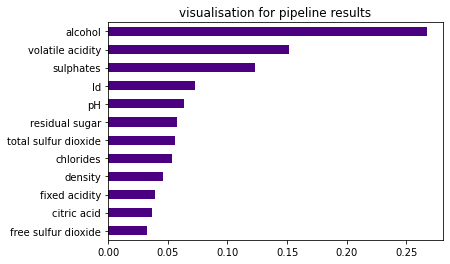

In [34]:
import matplotlib.pyplot as plt
combination.sort_values().plot(kind="barh",color='indigo')
plt.title('visualisation for pipeline results');